In [1]:
#import necessary lib
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,mean_squared_error, r2_score,classification_report,precision_recall_curve,auc, plot_precision_recall_curve
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale,StandardScaler

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

from sklearn import neighbors
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from numpy import sqrt,argmax
from matplotlib import pyplot

In [41]:
data = pd.read_csv('database_songs.csv')
data.head()

,explicit,name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist_name,Length (ln s)
0,False,Blood On The Dance Floor X Dangerous (The Whit...,0.743,0.924,4.0,-3.041,0.0,0.1190,0.2610,0.000000,0.394,0.548,110.042,4.0,Michael Jackson,5.387120
1,False,Chicago,0.608,0.756,7.0,-2.675,0.0,0.1760,0.0784,0.000000,0.187,0.550,176.086,4.0,Michael Jackson,5.503325
2,False,Loving You,0.711,0.744,7.0,-4.007,0.0,0.0680,0.0997,0.000019,0.147,0.676,94.523,4.0,Michael Jackson,5.275458
3,False,A Place With No Name,0.538,0.698,11.0,-4.282,0.0,0.3050,0.0103,0.000003,0.134,0.424,118.752,4.0,Michael Jackson,5.814569
4,False,Slave to the Rhythm,0.739,0.960,1.0,-2.293,1.0,0.0581,0.1460,0.000037,0.380,0.722,125.020,4.0,Michael Jackson,5.545127


In [3]:
def print_unique(data, col_names):
    for col in col_names:
        print(col, ': ', len(data[col].unique()))

In [4]:
columns = data.columns
print_unique(data,columns)

explicit :  2
name :  677
danceability :  395
energy :  424
key :  12
loudness :  651
mode :  2
speechiness :  432
acousticness :  567
instrumentalness :  523
liveness :  470
valence :  470
tempo :  648
time_signature :  4
artist_name :  2
Length (ln s) :  649


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677 entries, 0 to 676
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   explicit          677 non-null    bool   
 1   name              677 non-null    object 
 2   danceability      677 non-null    float64
 3   energy            677 non-null    float64
 4   key               677 non-null    float64
 5   loudness          677 non-null    float64
 6   mode              677 non-null    float64
 7   speechiness       677 non-null    float64
 8   acousticness      677 non-null    float64
 9   instrumentalness  677 non-null    float64
 10  liveness          677 non-null    float64
 11  valence           677 non-null    float64
 12  tempo             677 non-null    float64
 13  time_signature    677 non-null    float64
 14  artist_name       677 non-null    object 
 15  Length (ln s)     677 non-null    float64
dtypes: bool(1), float64(13), object(2)
memory us

In [4]:
# Create an instance of the label encoder
# Label encoder encodes target labels with value between 0 and number_classes-1
# e.g.: [0, 4, 10, 10, 4, 20] --> [0, 1, 2, 2, 1, 3]
encoder = LabelEncoder()
y= encoder.fit_transform(data.artist_name)

# Using a pandas dataframe to show the encoding
# encoder.classes_ contains the name of the labels
# encoder.transform() applies the encoding
pd.DataFrame(data=encoder.transform(encoder.classes_), index=encoder.classes_, columns=["Coding"])

,Coding
Madonna,0
Michael Jackson,1


In [40]:
data.explicit.value_counts()

False    654
True      23
Name: explicit, dtype: int64

In [45]:
data.time_signature.value_counts()

4.0    638
3.0     35
5.0      3
1.0      1
Name: time_signature, dtype: int64

In [42]:
data=data.drop(columns=["name","explicit"],axis=1)

In [46]:
X=data.loc[:, data.columns != 'artist_name']
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Length (ln s)
0,0.743,0.924,4.0,-3.041,0.0,0.1190,0.261000,0.000000,0.3940,0.548,110.042,4.0,5.387120
1,0.608,0.756,7.0,-2.675,0.0,0.1760,0.078400,0.000000,0.1870,0.550,176.086,4.0,5.503325
2,0.711,0.744,7.0,-4.007,0.0,0.0680,0.099700,0.000019,0.1470,0.676,94.523,4.0,5.275458
3,0.538,0.698,11.0,-4.282,0.0,0.3050,0.010300,0.000003,0.1340,0.424,118.752,4.0,5.814569
4,0.739,0.960,1.0,-2.293,1.0,0.0581,0.146000,0.000037,0.3800,0.722,125.020,4.0,5.545127
...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,0.674,0.886,1.0,-8.137,1.0,0.0487,0.004880,0.450000,0.0981,0.576,127.986,4.0,6.418194
673,0.702,0.992,7.0,-5.931,1.0,0.0756,0.008340,0.836000,0.1610,0.678,127.973,4.0,5.944858
674,0.662,0.851,1.0,-7.694,1.0,0.0360,0.059900,0.011100,0.0944,0.735,127.966,4.0,5.494065
675,0.597,0.892,1.0,-6.368,1.0,0.0360,0.000939,0.238000,0.1040,0.740,128.001,4.0,5.748670


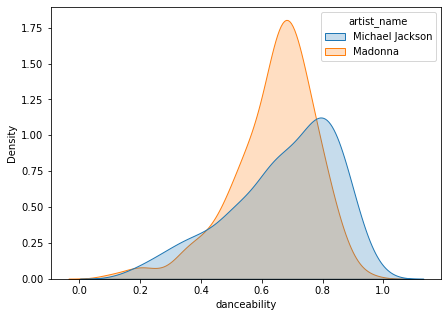

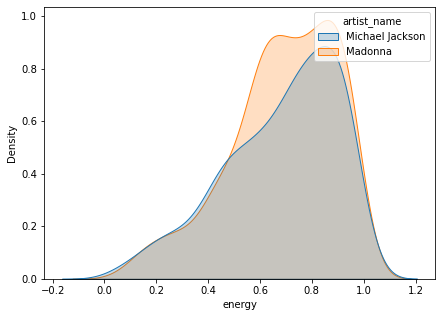

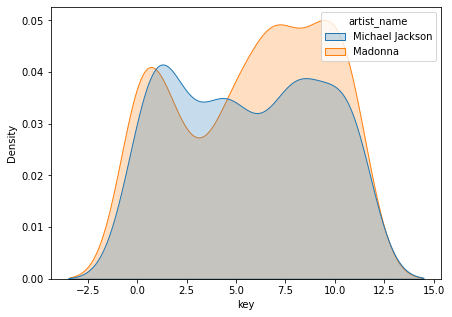

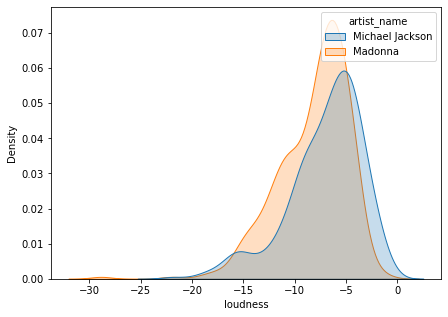

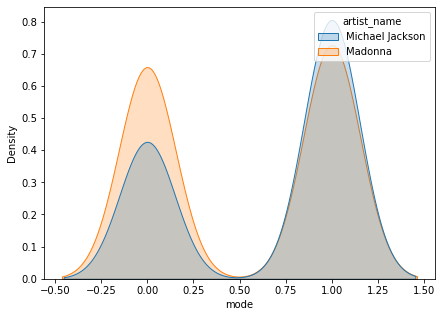

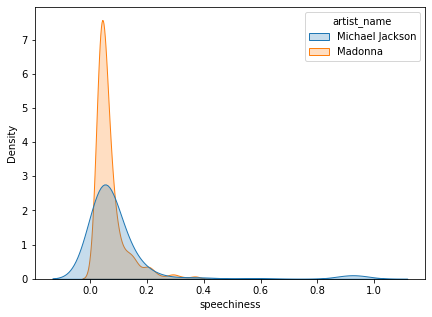

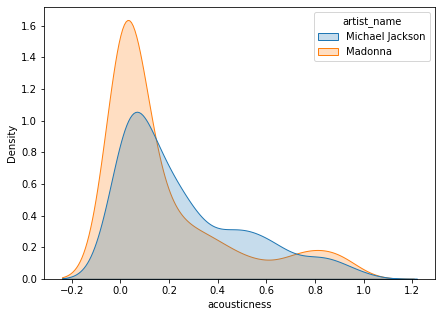

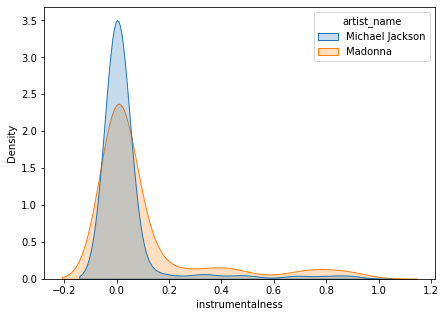

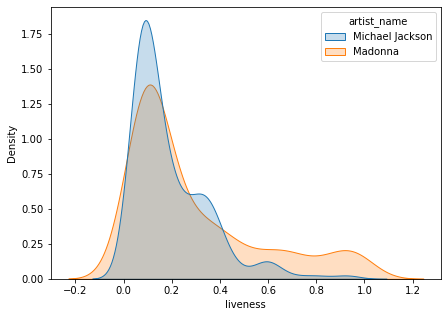

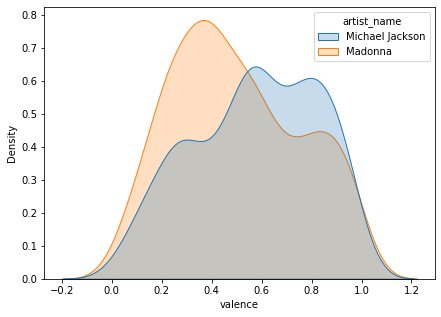

In [47]:
# Plot outputs appear and are stored within the notebook
%matplotlib inline

from matplotlib import pyplot as plt
import seaborn as sns

for i, (column, color) in enumerate(zip(X.columns, sns.color_palette())):
    # plt.figure(i) creates a new plot in every iteration
    # sns.kdeplot plots the kernel density estimate (KDE)
    # x=column: current column of the DF
    # fill=True: fill in the area under the curve
    # hue='artist_name': variable to use for coloring and the legend
    plt.figure(i,figsize=(7,5))
    sns.kdeplot(x=column, fill=True, hue=data.artist_name, data=X, color=color)

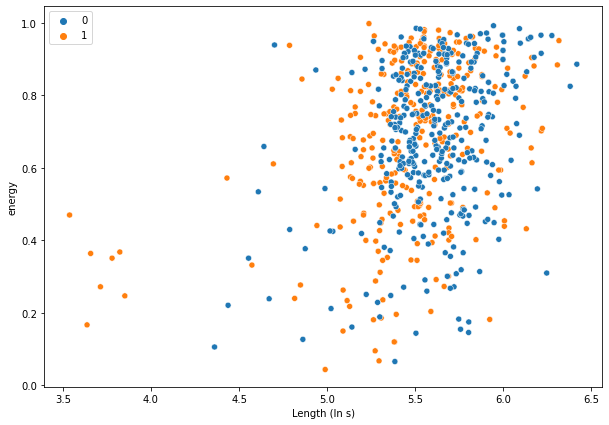

In [48]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='Length (ln s)', y='energy', hue=y, data=X)
plt.show()

<AxesSubplot:>

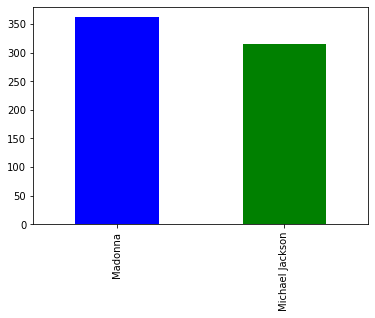

In [49]:
data.artist_name.value_counts().plot(kind='bar',color=["b","g"])

In [50]:
#scaling
# Creating a scaler object (here with default settings)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.56633752,  1.13779373, -0.45787741, ..., -0.3713373 ,
         0.2001013 , -0.46394484],
       [-0.28088558,  0.34289924,  0.35786734, ...,  2.397377  ,
         0.2001013 , -0.12693678],
       [ 0.36551427,  0.28612106,  0.35786734, ..., -1.02192898,
         0.2001013 , -0.7877765 ],
       ...,
       [ 0.05800366,  0.79239314, -1.27362216, ...,  0.38007744,
         0.2001013 , -0.15379295],
       [-0.34991858,  0.98638525, -1.27362216, ...,  0.38154472,
         0.2001013 ,  0.58458794],
       [-0.83314953, -0.12078921,  1.44552702, ...,  0.14904382,
         0.2001013 , -0.23314062]])

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

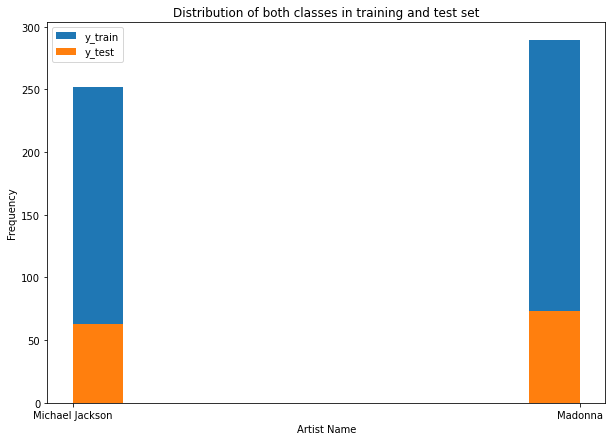

In [52]:
# Create an empty figure
plt.figure(figsize=(10,7))
# Plot the histogram of training labels
plt.hist(encoder.inverse_transform(y_train))
# Plot the histogram of test labels
plt.hist(encoder.inverse_transform(y_test))
# Add the legend
plt.legend(['y_train', 'y_test'])
# Name the axes 
plt.ylabel('Frequency')
plt.xlabel('Artist Name')
# Set the title of the plot
plt.title("Distribution of both classes in training and test set")
# Show the plot
plt.show()

In [53]:
accu=pd.DataFrame(index=["Accuracy"])
prec=pd.DataFrame(index=["Precision"])
rec=pd.DataFrame(index=["Recall"])
f1=pd.DataFrame(index=["F1"])
roc_aucs=pd.DataFrame(index=["ROC-AUC"])
pr_aucs=pd.DataFrame(index=["PR-AUC"])

In [54]:
def compML(alg):
    model_name = alg.__name__
    model = alg().fit(X_train,y_train)
    y_pred = model.predict(X_test)
    #accurasy bakalım
    acc = accuracy_score(y_test,y_pred)
    print(model_name,'Model accuracy:', acc)
    accu.insert(0, model_name,acc)
    #f-pre-recal
    prf=precision_recall_fscore_support(y_test, y_pred,average='macro')[:3]
    print(model_name,'Precision-Recall-F score:', prf)
    prec.insert(0, model_name,prf[0])
    rec.insert(0, model_name,prf[1])
    f1.insert(0, model_name,prf[2])
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    roc_auc=metrics.auc(fpr, tpr)
    roc_aucs.insert(0, model_name,roc_auc)
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
    auc_precision_recall = auc(recall, precision)
    pr_aucs.insert(0, model_name,auc_precision_recall)
    print(model_name,"model tuned roc auc:", roc_auc)
    print(model_name,"model tuned roc auc:",auc_precision_recall)
    print(model_name,"model report:",classification_report(y_test,y_pred))

In [55]:
models =[RidgeClassifier,
         BaggingClassifier,
         KNeighborsClassifier,
         LogisticRegression,
         SVC,
         MLPClassifier,
         DecisionTreeClassifier,
         RandomForestClassifier,
         GradientBoostingClassifier,
         CatBoostClassifier,
         LGBMClassifier,
         XGBClassifier,
         GaussianNB,
         ExtraTreesClassifier,
         AdaBoostClassifier, 
]

In [ ]:
for i in models:
    compML(i)

<AxesSubplot:>

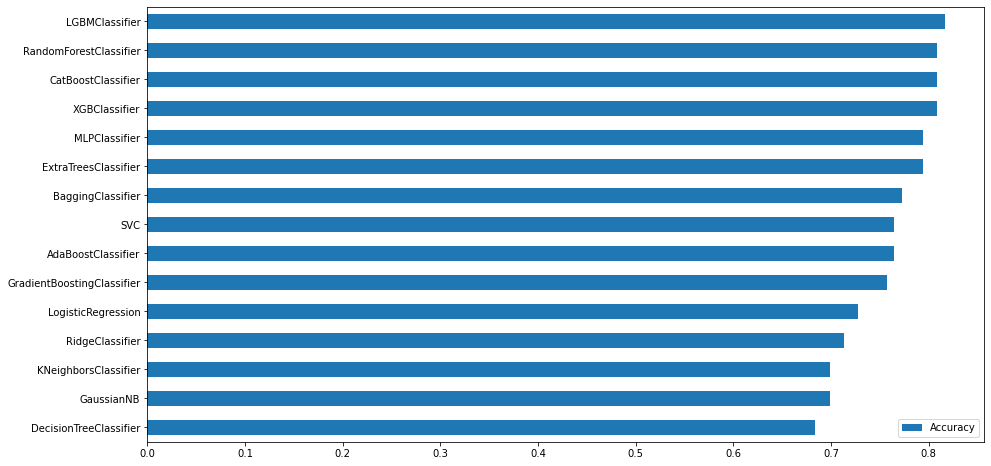

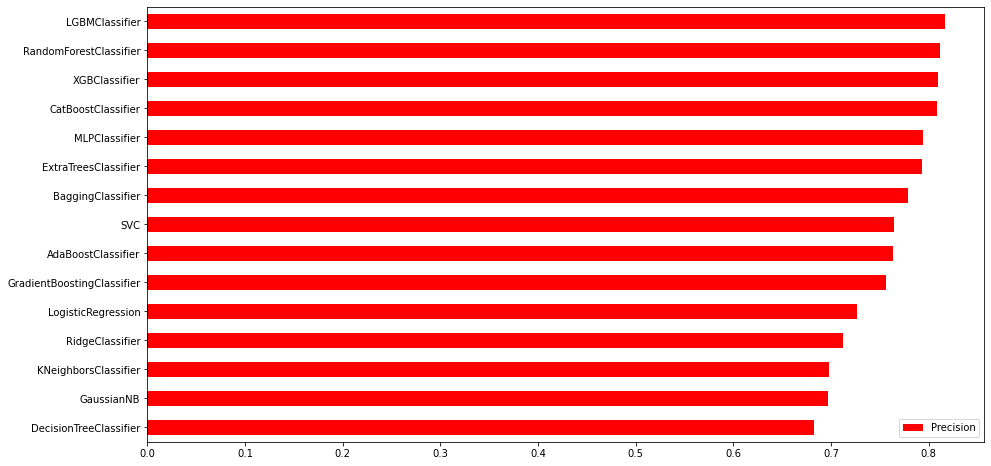

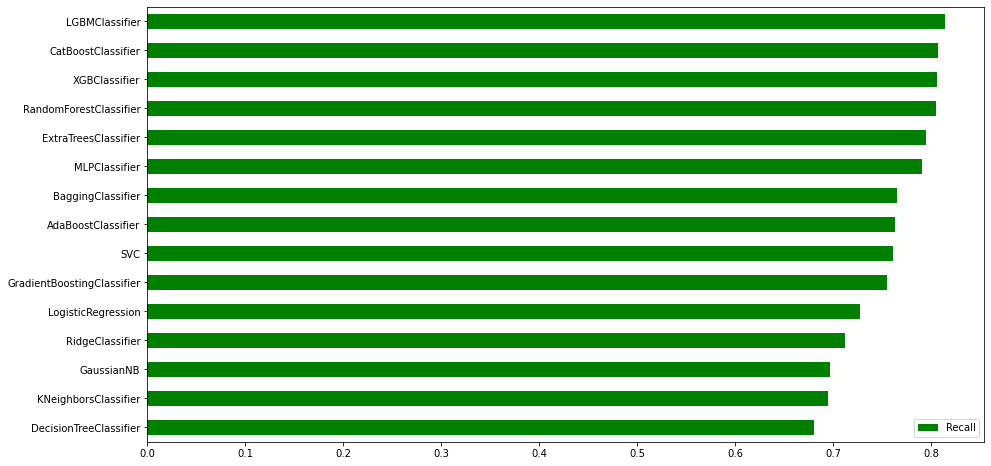

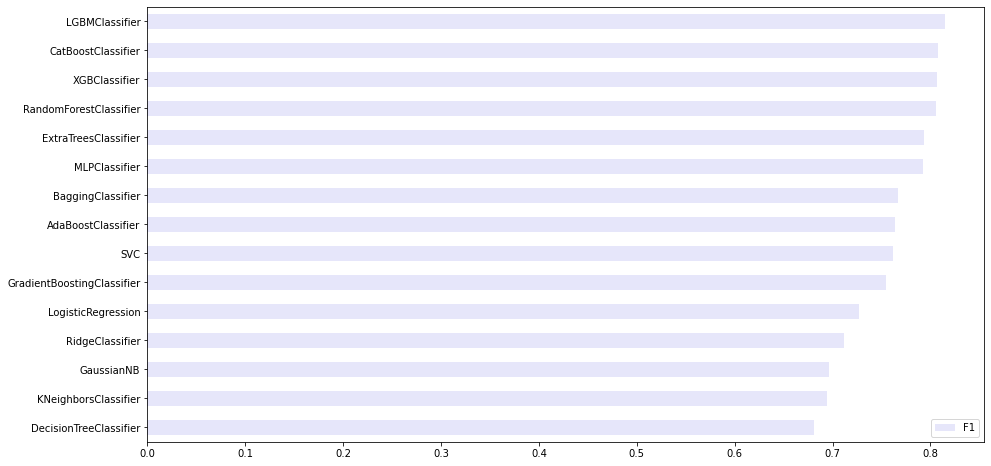

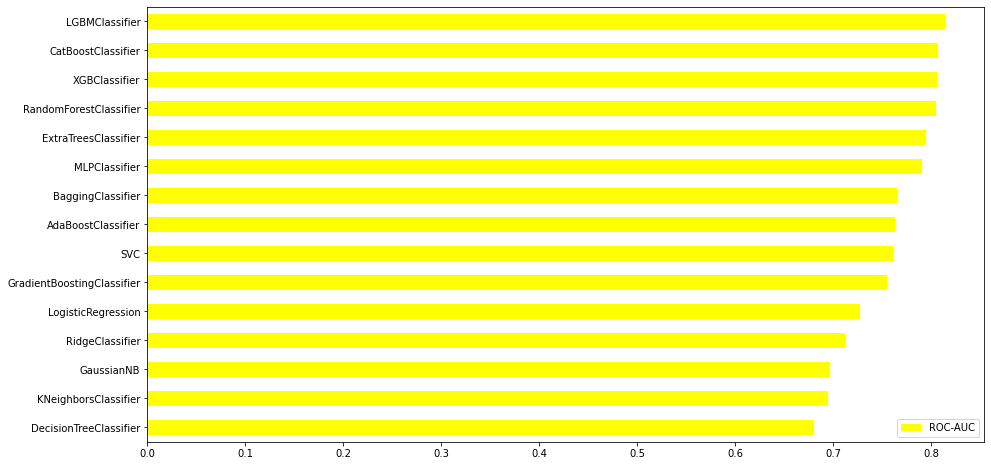

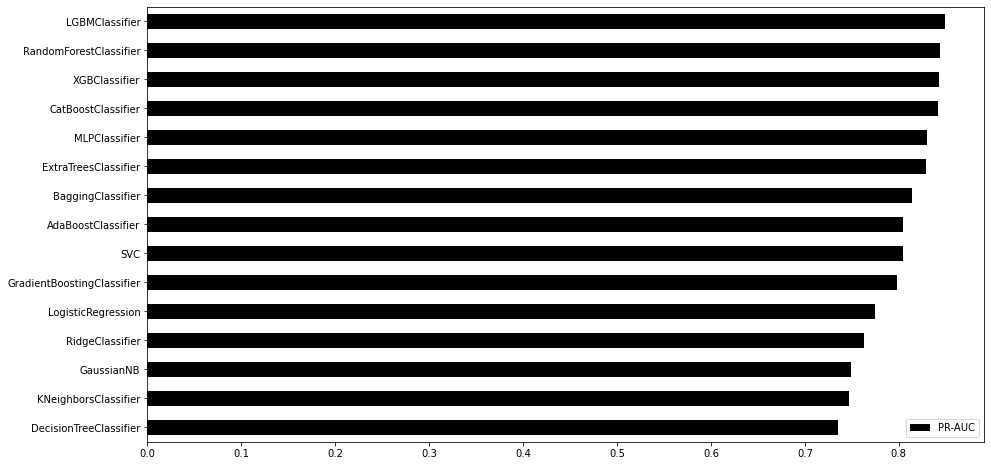

In [57]:
accu.T.sort_values(by="Accuracy").plot(kind="barh",figsize=(15,8))
prec.T.sort_values(by="Precision").plot(kind="barh",figsize=(15,8),color='red')
rec.T.sort_values(by="Recall").plot(kind="barh",figsize=(15,8),color="green")
f1.T.sort_values(by="F1").plot(kind="barh",figsize=(15,8),color="lavender")
roc_aucs.T.sort_values(by="ROC-AUC").plot(kind="barh",figsize=(15,8),color="yellow")
pr_aucs.T.sort_values(by="PR-AUC").plot(kind="barh",figsize=(15,8),color="black")

In [58]:
def tuning(alg,params):
    model_name = alg.__name__
    model=GridSearchCV(alg(),params,cv=5,n_jobs=-1).fit(X_train,y_train)
    tuned_model=alg(**model.best_params_).fit(X_train,y_train)
    y_pred = tuned_model.predict(X_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    roc_auc=metrics.auc(fpr, tpr)
    roc_aucs.insert(0, "tuned"+model_name,roc_auc)
    acc = accuracy_score(y_test,y_pred)
    accu.insert(0, "tuned"+model_name,acc)
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
    auc_precision_recall = auc(recall, precision)
    pr_aucs.insert(0, "tuned"+model_name,auc_precision_recall)
    print(model_name,'model tuned accuracy:', acc)
    print(model_name,"model tuned roc auc:", roc_auc)
    print(model_name,"model tuned roc auc:",auc_precision_recall)
    print(model_name,"model tuned:",classification_report(y_test,y_pred))

In [59]:
#https://medium.com/swlh/the-hyperparameter-cheat-sheet-770f1fed32ff
params=[{"alpha" : np.logspace(1, 4, 50)},
        {'max_samples' : [0.05, 0.1, 0.2, 0.5],"n_estimators" : [10, 100, 1000]},
        {"n_neighbors": range(1,50,2),"weights" : ['uniform', 'distance'],"metric" : ['euclidean', 'manhattan', 'minkowski']},
        {"solver": ['newton-cg', 'lbfgs', 'liblinear'],"penalty" : ["none", "l1", "l2", "elasticnet"],"C" : [100, 10, 1.0, 0.1, 0.01]},
        {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid',"linear"]},
        {"alpha" : [5,0.1,0.01,0.0001, 0.05],"hidden_layer_sizes": [(100,100,100),(100,100)]},
        {"max_depth":[1,3,4,5,10],"min_samples_split":[2,10,5,30],"criterion": ["gini", "entropy"]},
        {"max_features": [2,5], "n_estimators":[200,500,1000],"min_samples_split":[2,10,80]},
        {"learning_rate":[0.1,0.01], "max_depth":[None,1,3,5,10],"n_estimators":[100,150,200],"subsample" : [0.5, 0.7, 1.0]},
        {"iterations":[200,500,100], "learning_rate":[0.01,0.1], "depth":[3,6,8]},
        {"learning_rate": [0.01,0.1,0.5,1],"n_estimators":[40,100,1000],"max_depth":[-1,1,2,3]},
        {"learning_rate": [0.1,0.01] , "max_depth":[4,5,8],"n_estimators":[100,500],"subsample":[0.5,1]},
        {'var_smoothing': np.logspace(0,-9, num=100)},
        {'n_estimators': range(50,126,25),'min_samples_leaf': range(20,50,5),'min_samples_split': range(15,36,5)},
        {"learning_rate": [0.2,0.5,0.001,0.1,0.01],'n_estimators':[100,200] }
        ]


In [60]:
for m, p in zip(models, params):
    tuning(m,p)

RidgeClassifier model tuned accuracy: 0.7058823529411765
RidgeClassifier model tuned roc auc: 0.705370732767993
RidgeClassifier model tuned roc auc: 0.7575208288443583
RidgeClassifier model tuned:               precision    recall  f1-score   support

           0       0.73      0.71      0.72        73
           1       0.68      0.70      0.69        63

    accuracy                           0.71       136
   macro avg       0.70      0.71      0.70       136
weighted avg       0.71      0.71      0.71       136

BaggingClassifier model tuned accuracy: 0.8161764705882353
BaggingClassifier model tuned roc auc: 0.8124592302674495
BaggingClassifier model tuned roc auc: 0.8498925432241862
BaggingClassifier model tuned:               precision    recall  f1-score   support

           0       0.81      0.86      0.83        73
           1       0.83      0.76      0.79        63

    accuracy                           0.82       136
   macro avg       0.82      0.81      0.81       13

C:\Users\HE\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.74114849 0.74114849        nan        nan        nan 0.74114849
 0.74114849 0.74114849 0.74114849        nan        nan        nan
 0.74114849 0.74114849        nan        nan        nan 0.74114849
 0.74114849 0.74114849 0.74114849        nan        nan        nan
 0.74114849 0.74114849        nan        nan        nan 0.73929664
 0.74114849 0.74114849 0.74114849        nan        nan        nan
 0.74114849 0.74114849        nan        nan        nan 0.72088005
 0.73747876 0.73747876 0.73566089        nan        nan        nan
 0.74114849 0.74114849        nan        nan        nan 0.5341998
 0.72271492 0.72271492 0.71534149        nan        nan        nan]
  warnings.warn(
C:\Users\HE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn

LogisticRegression model tuned accuracy: 0.7205882352941176
LogisticRegression model tuned roc auc: 0.7201565557729942
LogisticRegression model tuned roc auc: 0.7694731738849385
LogisticRegression model tuned:               precision    recall  f1-score   support

           0       0.75      0.73      0.74        73
           1       0.69      0.71      0.70        63

    accuracy                           0.72       136
   macro avg       0.72      0.72      0.72       136
weighted avg       0.72      0.72      0.72       136

SVC model tuned accuracy: 0.7647058823529411
SVC model tuned roc auc: 0.7612524461839532
SVC model tuned roc auc: 0.8046752599344823
SVC model tuned:               precision    recall  f1-score   support

           0       0.77      0.81      0.79        73
           1       0.76      0.71      0.74        63

    accuracy                           0.76       136
   macro avg       0.76      0.76      0.76       136
weighted avg       0.76      0.76      0.

C:\Users\HE\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\HE\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier model tuned accuracy: 0.7647058823529411
MLPClassifier model tuned roc auc: 0.7645140247879973
MLPClassifier model tuned roc auc: 0.8053302090066796
MLPClassifier model tuned:               precision    recall  f1-score   support

           0       0.79      0.77      0.78        73
           1       0.74      0.76      0.75        63

    accuracy                           0.76       136
   macro avg       0.76      0.76      0.76       136
weighted avg       0.77      0.76      0.76       136

DecisionTreeClassifier model tuned accuracy: 0.7205882352941176
DecisionTreeClassifier model tuned roc auc: 0.7147205914329202
DecisionTreeClassifier model tuned roc auc: 0.7656555046260929
DecisionTreeClassifier model tuned:               precision    recall  f1-score   support

           0       0.72      0.79      0.75        73
           1       0.73      0.63      0.68        63

    accuracy                           0.72       136
   macro avg       0.72      0.71      

C:\Users\HE\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:40:21] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:40:21] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier model tuned accuracy: 0.7867647058823529
XGBClassifier model tuned roc auc: 0.7818003913894326
XGBClassifier model tuned roc auc: 0.8251050420168067
XGBClassifier model tuned:               precision    recall  f1-score   support

           0       0.78      0.85      0.81        73
           1       0.80      0.71      0.76        63

    accuracy                           0.79       136
   macro avg       0.79      0.78      0.78       136
weighted avg       0.79      0.79 

<AxesSubplot:>

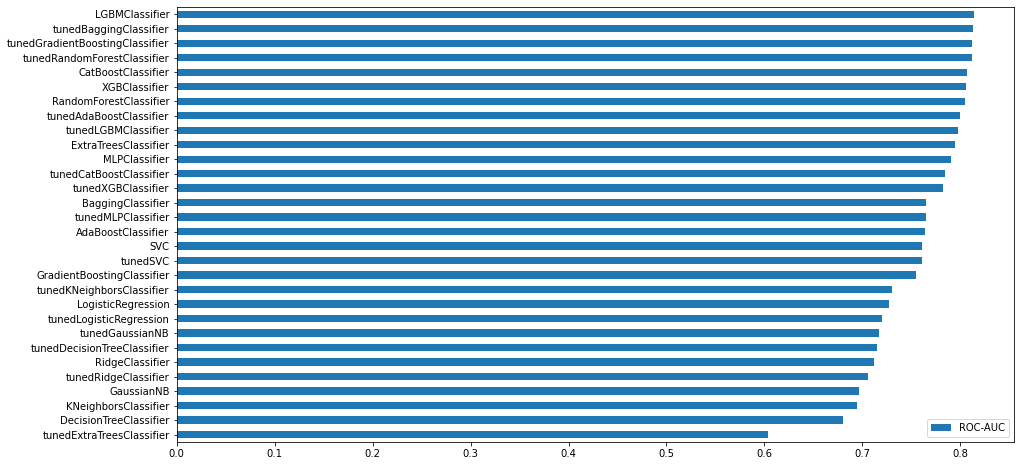

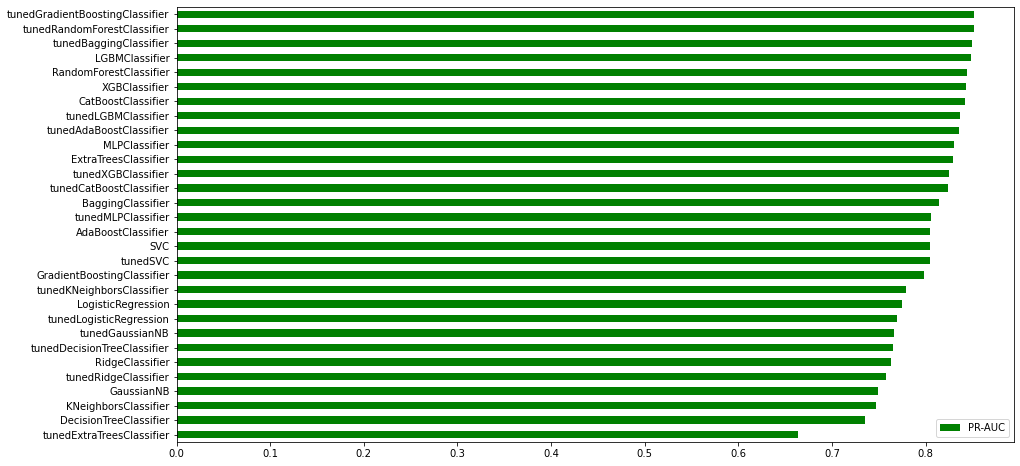

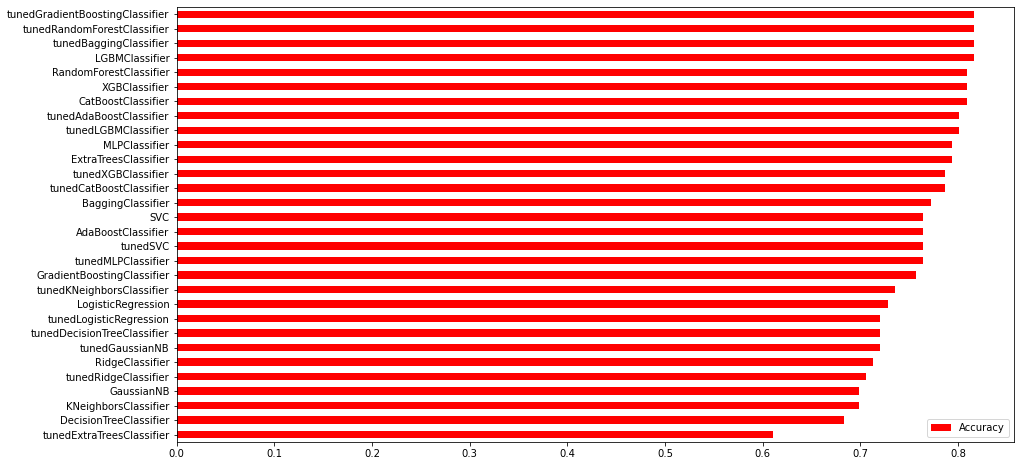

In [61]:
roc_aucs.T.sort_values(by="ROC-AUC").plot(kind="barh",figsize=(15,8))
pr_aucs.T.sort_values(by="PR-AUC").plot(kind="barh",figsize=(15,8),color="green")
accu.T.sort_values(by="Accuracy").plot(kind="barh",figsize=(15,8),color='red')

In [85]:
gb_params={"learning_rate":[0.1,0.01], "max_depth":[None,1,3,5,10],"n_estimators":[100,150,200],"subsample" : [0.5, 0.7, 1.0]}
gb_model=GridSearchCV(GradientBoostingClassifier(),gb_params,cv=5,n_jobs=-1).fit(X_train,y_train)
gb_tuned=GradientBoostingClassifier(**gb_model.best_params_).fit(X_train,y_train)
y_pred = gb_tuned.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8382352941176471
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        73
           1       0.85      0.79      0.82        63

    accuracy                           0.84       136
   macro avg       0.84      0.84      0.84       136
weighted avg       0.84      0.84      0.84       136



<Figure size 432x288 with 0 Axes>

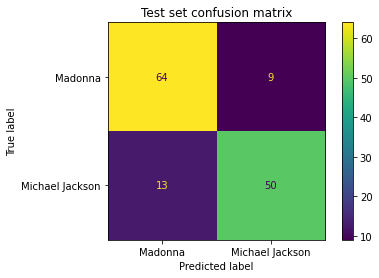

In [86]:
from sklearn.metrics import plot_confusion_matrix

plt.figure()
plot_confusion_matrix(gb_tuned, X_test, y_test, display_labels=encoder.classes_[0:2])
plt.title('Test set confusion matrix')
plt.show()

[0 1]


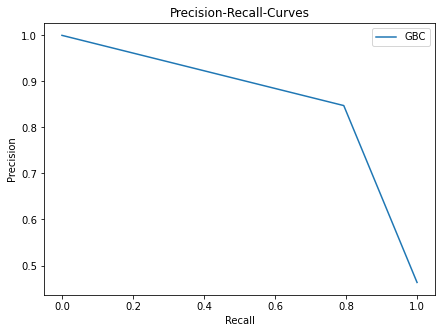

In [87]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, gb_tuned.predict(X_test))


print(thresholds)
#Plot the curve
plt.figure(figsize=[7,5])
plt.plot(recall, precision, label='GBC')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall-Curves')
plt.legend(loc='upper right')
plt.show()

Best Threshold=0.619541, G-Mean=0.839


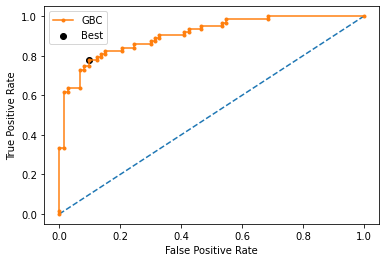

In [88]:
#optimal threshold finder

yhat = gb_tuned.predict_proba(X_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.', label='GBC')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [89]:
#THRESHOLD CHNGING
y_pred = (tuned_model.predict_proba(X_test)[:,1] >= 0.619541)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8088235294117647
              precision    recall  f1-score   support

           0       0.78      0.89      0.83        73
           1       0.85      0.71      0.78        63

    accuracy                           0.81       136
   macro avg       0.82      0.80      0.80       136
weighted avg       0.81      0.81      0.81       136



In [92]:
#rf+bc
rf_params={"max_features": [2,5], "n_estimators":[200,500,1000],"min_samples_split":[2,10,80]}
rf_model=GridSearchCV(RandomForestClassifier(),rf_params,cv=5,n_jobs=-1).fit(X_train,y_train)
rf_tuned=RandomForestClassifier(**rf_model.best_params_).fit(X_train,y_train)
y_pred = rf_tuned.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


0.8235294117647058
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        73
           1       0.82      0.79      0.81        63

    accuracy                           0.82       136
   macro avg       0.82      0.82      0.82       136
weighted avg       0.82      0.82      0.82       136



In [95]:
b_params={'max_samples' : [0.05, 0.1, 0.2, 0.5],"n_estimators" : [10, 100, 1000]}
b_model=GridSearchCV(BaggingClassifier(),b_params,cv=5,n_jobs=-1).fit(X_train,y_train)
b_tuned=BaggingClassifier(**b_model.best_params_).fit(X_train,y_train)
y_pred = b_tuned.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8161764705882353
              precision    recall  f1-score   support

           0       0.82      0.85      0.83        73
           1       0.82      0.78      0.80        63

    accuracy                           0.82       136
   macro avg       0.82      0.81      0.81       136
weighted avg       0.82      0.82      0.82       136



In [96]:
#best 3 models ensembling
vr = VotingClassifier([('rf', rf_tuned), ('bagging', b_tuned),
                      ("gb",	gb_tuned)]).fit(X_train,y_train)
y_pred = vr.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8308823529411765
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        73
           1       0.83      0.79      0.81        63

    accuracy                           0.83       136
   macro avg       0.83      0.83      0.83       136
weighted avg       0.83      0.83      0.83       136

